In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
beerData = pd.read_csv('AusBeerProduction.csv', names = ['month', 'beerProduction'], header=0)
beerData.head()

,month,beerProduction
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
def countNan(dataset):
    for col in dataset.columns.tolist():
        naCount = sum(pd.isna(dataset[col]))
        print(str(col) + ": " + str(naCount))

countNan(beerData)

month: 0
beerProduction: 0


In [4]:
beerData.shape

(476, 2)

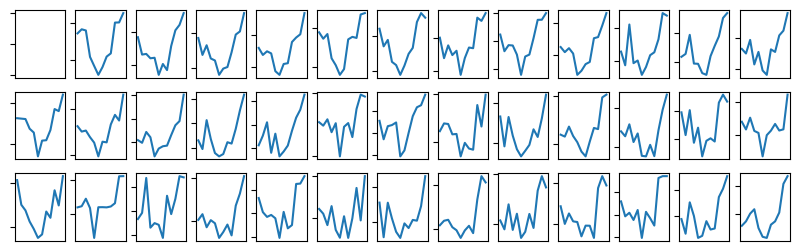

In [5]:
j=0
fig, axs = plt.subplots(3, 13, figsize=(10, 3))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.plot(beerData.month[j:i*12], beerData.beerProduction[j:i*12])
    j = i*12
    ax.set_xticks([])  
    ax.set_xticks([])  
    ax.set_xticklabels([])  
    ax.set_yticklabels([])
plt.show()

#Due to approximation, not all data at the end is plotted.....

SARIMAX

In [34]:
order = (5, 1, 5)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters (P, D, Q, s)

model = SARIMAX(beerData.beerProduction, order=order, seasonal_order=seasonal_order)
results = model.fit()

forecast = results.get_forecast(steps=12)

forecast_values = forecast.predicted_mean

ci_lower = forecast.conf_int().iloc[:, 0]
ci_upper = forecast.conf_int().iloc[:, 1]


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65993D+00    |proj g|=  1.66171D-01

At iterate    5    f=  3.63535D+00    |proj g|=  3.36126D-02

At iterate   10    f=  3.59547D+00    |proj g|=  3.00601D-02

At iterate   15    f=  3.56790D+00    |proj g|=  1.63093D-01

At iterate   20    f=  3.55360D+00    |proj g|=  1.99071D-01

At iterate   25    f=  3.54331D+00    |proj g|=  9.09652D-02

At iterate   30    f=  3.53966D+00    |proj g|=  4.52823D-02

At iterate   35    f=  3.53846D+00    |proj g|=  7.46012D-02

At iterate   40    f=  3.53549D+00    |proj g|=  3.80867D-02

At iterate   45    f=  3.53270D+00    |proj g|=  3.20199D-02

At iterate   50    f=  3.53178D+00    |proj g|=  3.29352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/rohanjadhav/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


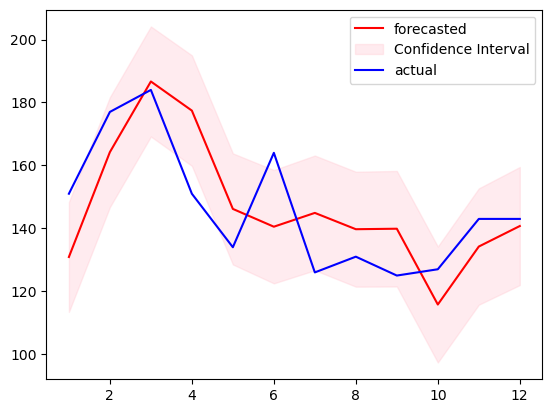

In [35]:
plt.plot(list(range(1,13)), forecast.prediction_results.forecasts[0], color='red', label='forecasted')
plt.fill_between(list(range(1, 13)), ci_lower, ci_upper, color='pink', alpha=0.3, label='Confidence Interval')
plt.plot(list(range(1,13)), beerData.beerProduction[453:465], color='blue', label='actual')
plt.legend()
plt.show()